In [104]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [109]:
from dataloader import *
from display import *
# from dataloader import load_nosepoint, reag_img_part1

In [110]:
file_name = "./imm_face_db/01-1m.asf"
load_points_from_asf(open(file_name))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


array([[0.6407798 , 0.3576361 ],
       [0.6824325 , 0.3626764 ],
       [0.72945964, 0.3747732 ],
       [0.78051776, 0.39896673],
       [0.8167959 , 0.42215222],
       [0.84769946, 0.4594506 ],
       [0.8544176 , 0.4907006 ],
       [0.83963764, 0.5370716 ],
       [0.8100777 , 0.56428933],
       [0.77245593, 0.5824345 ],
       [0.72811604, 0.59755546],
       [0.6904943 , 0.6076361 ],
       [0.6501853 , 0.61469257],
       [0.50776005, 0.5844506 ],
       [0.4929801 , 0.5693296 ],
       [0.48760554, 0.5532006 ],
       [0.49029282, 0.5310232 ],
       [0.50641644, 0.5229587 ],
       [0.51179093, 0.54110384],
       [0.5158219 , 0.5562248 ],
       [0.5158219 , 0.57235384],
       [0.5050728 , 0.39291835],
       [0.48894918, 0.41106352],
       [0.48088738, 0.43021673],
       [0.49163646, 0.4483619 ],
       [0.5050728 , 0.46449092],
       [0.5104473 , 0.44634578],
       [0.51179093, 0.4282006 ],
       [0.5091037 , 0.41005543],
       [0.47551286, 0.5078377 ],
       [0.

In [111]:
part1_transform = transforms.Compose([Rescale((80, 60)),])

In [100]:
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
person_idx = np.arange(32)
viewpt_idx = np.arange(6)
training_set = NoseKeypointDataset(person_idx, viewpt_idx)
# training_set = FaceKeypointsDataset(person_idx=[0], viewpt_idx=[0])

AssertionError: 0

(480, 640)


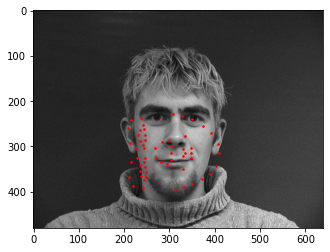

In [80]:
# Plotting a few input images and their nose keypoints.
plt.figure()
image = training_set[0]['image']
print(image.shape)
show_landmarks(training_set[0]['image'], training_set[0]['landmarks'])
# show_landmarks(training_set[0]['image'], np.array([[100, 200], [200, 300]]))
plt.show()

In [211]:
# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
person_idx = np.arange(32, 40)
viewpt_idx = np.arange(6)
validation_set = NoseKeypointDataset(person_idx, viewpt_idx)

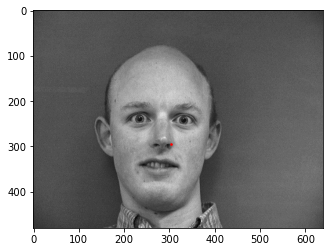

In [215]:
# Plotting a few input images and their nose keypoints.
plt.figure()
show_landmarks(validation_set[0]['image'], validation_set[0]['landmarks'])
plt.show()